Un progetto di:
Giorgia D'Antoni - 620020, 
Alessio Cascione - 582765

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cbook import boxplot_stats 
from scipy.stats import zscore as zs
from sklearn.preprocessing import MinMaxScaler

from plotly.offline import iplot
import plotly as py
import plotly.express as px
import cufflinks as cf
import plotly.graph_objects as go
import plotly.figure_factory as ff

cf.go_offline()
py.offline.init_notebook_mode(connected=True)

Error importing optional module skimage
Traceback (most recent call last):
  File "C:\Users\giorg\anaconda3\lib\site-packages\_plotly_utils\optional_imports.py", line 30, in get_module
    return import_module(name)
  File "C:\Users\giorg\anaconda3\lib\importlib\__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1014, in _gcd_import
  File "<frozen importlib._bootstrap>", line 991, in _find_and_load
  File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 671, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\Users\giorg\anaconda3\lib\site-packages\skimage\__init__.py", line 177, in <module>
    from .data import data_dir
  File "C:\Users\giorg\anaconda3\lib\site-packages\skimage\data\__init__.p

# Data Understanding

Il dataset analizzato prende il nome di *HR Dataset v14* ed è composto da 311 righe e 36 colonne, ovvero le features del nostro dataset, riguardanti informazioni su una società fittizia. In particolare la nostra attenzione sarà focalizzata sul rapporto tra tre variabili principali da noi scelte, ovvero *Salary*, *PerformanceScore* e *Absences*, e le altre variabili presenti nel dataset. Per una maggiore descrizione delle features (o variabili) presenti nel dataset è possibile visitare il seguente link: https://rpubs.com/rhuebner/hrd_cb_v14.

In [2]:
df = pd.read_csv("HRDataset_v14.csv")

In [3]:
df.shape

(311, 36)

Al fine di ottenere una parziale visualizzazione del nostro dataset utilizziamo i comandi *head()* e *tail()* che di default mostrano le prime e le ultime cinque righe del dataset.

In [4]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [5]:
df.tail()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11
310,"Zima, Colleen",10271,0,4,0,1,5,3,0,45046,...,David Stanley,14.0,LinkedIn,Fully Meets,4.50,5,0,1/30/2019,0,2


Per una migliore comprensione del dataset con cui lavoreremo, attraverso il comando *describe()*, visualizziamo diversi dettagli statistici delle variabili come: la media, la quantità dei valori presenti in ogni categoria, la deviazione standard, il valore minimo, il valore massimo e il valore dei diversi percentili.
Inoltre, attraverso l'utilizzo del comando *dtypes* visualizziamo, per ogni variabile, il tipo di dati assunto dai suoi valori.

In [6]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [7]:
df.dtypes  

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

## Missing Values

Un altro step importante consiste nel controllare la presenza di valori mancanti del dataset: la loro presenza può essere riconducibile a diverse cause, come un errore nella compilazione, un rifiuto nel rispondere, un sensore rotto o altro. Controlliamo dunque se ci sono variabili in cui sono presenti valori mancanti:

In [8]:
df.isna().any()

Employee_Name                 False
EmpID                         False
MarriedID                     False
MaritalStatusID               False
GenderID                      False
EmpStatusID                   False
DeptID                        False
PerfScoreID                   False
FromDiversityJobFairID        False
Salary                        False
Termd                         False
PositionID                    False
Position                      False
State                         False
Zip                           False
DOB                           False
Sex                           False
MaritalDesc                   False
CitizenDesc                   False
HispanicLatino                False
RaceDesc                      False
DateofHire                    False
DateofTermination              True
TermReason                    False
EmploymentStatus              False
Department                    False
ManagerName                   False
ManagerID                   

Come sopraindicato, le variabili *DateofTermination* e *ManagerID* presentano valori mancanti. Di conseguenza visualizziamo il numero di valori mancanti per ciascuna delle categorie sopracitate, trovando un totale di 207 valori mancanti per *DateofTermination* e 8 per *ManagerID*. I valori mancanti di *DateofTermination* non sono valori assenti legati ad errori di inserimento o mancanza di informazione, ma la semantica della variabile prevede che questa non assuma valore per quegli impiegati ancora attivi: da ciò deriva l'alto numero di valori mancanti per la feature in questione.

In [9]:
df.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

## Grafici e BarCharts

Prima di iniziare la nostra analisi, attraverso l'utilizzo di barplots e piecharts osserviamo la composizione e la frequenza di alcune variabili presenti nel dataset e di maggiore interesse: *Sex, PerformanceScore, RaceDesc* e *MaritalDesc*.

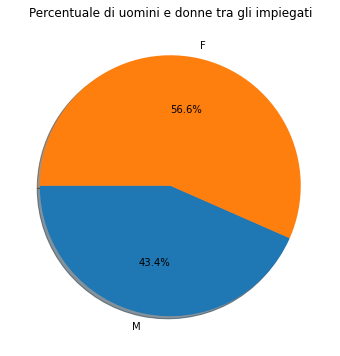

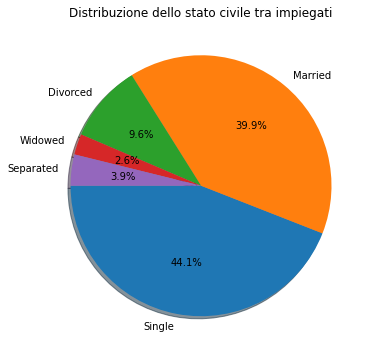

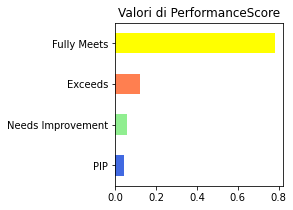

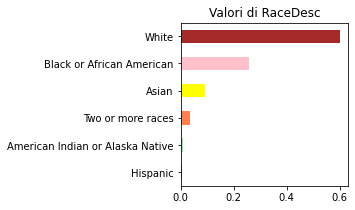

In [10]:


labels = ['M','F']
sizes = [len(df[df['Sex'] == 'M ']),len(df[df['Sex'] == 'F'])]


plt.figure(figsize=(6,6))


plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('Percentuale di uomini e donne tra gli impiegati')

plt.show()

marital_column = list(df['MaritalDesc'].unique())
sizes_2 = [len(df[df['MaritalDesc'] == x]) for x in marital_column ]



plt.pie(sizes_2, labels = marital_column, autopct = '%1.1f%%', shadow = True, startangle = 180)
plt.title('Distribuzione dello stato civile tra impiegati')

fig_pie_2 = plt.gcf()
fig_pie_2.set_size_inches(6,6)

plt.show()


col_list_categorical = df[['PerformanceScore', 'RaceDesc']]
for e in col_list_categorical:
    
        df[e].value_counts(normalize=True, ascending=True).plot(kind='barh', title=f'{e} values', color=['royalblue','lightgreen','coral', 'yellow', 'pink', 'brown', 'black', 'grey','green'], figsize=(3,3))
        plt.title('Valori di '  + e)
        plt.show()


Il primo piechart riporta i valori della variabile *Sex*, ovvero *F* e *M* (female e male) e ci permette di osservare che gli individui di sesso femminile sono presenti in maggior numero rispetto quelli di sesso maschile all'interno del nostro dataset.
Il secondo piechart riporta invece i valori assunti dalla variabile *MaritalDesc*: *Single, Married, Divorced, Separated* e *Widowed*. Il grafico mostra che la variabile assume maggiormente i valori di *Single* e *Married* all'interno del dataset.
Il primo barplot, invece, riporta i valori assunti dalla variabile *PerformanceScore*, ovvero *PIP, Fully Meets, Exceeds, Needs Improvement*, con un maggior numero di valori appartenenti a *Fully Meets* e *Exceeds*.
Il secondo barplot, invece, riporta i valori che può assumere la variabile *RaceDesc*: *White, Black or African American, Asian,Two or more races, American Indian or Alaska Native* e *Hispanic*. Il valore *White* è presente in stragrande maggioranza rispetto agli altri, i valori presenti in quantità minore nella variabile *RaceDesc* sono invece *American Indian or Alaska Native* e *Hispanic*.


# Analisi del salario

Ci focalizziamo ora sul modo in cui il salario è distribuito rispetto alle diverse unità statistiche del dataset: visualizziamo prima il comportamento della variabile facendo uso di un istogramma, con lo scopo di osservare in generale la distribuzione di questa nel campione preso in considerazione. Ci concentreremo poi su uno studio mirato del salario rispetto ad altre categorie visualizzando i boxplot e gli outlier che emergeranno dalla rappresentazione grafica.

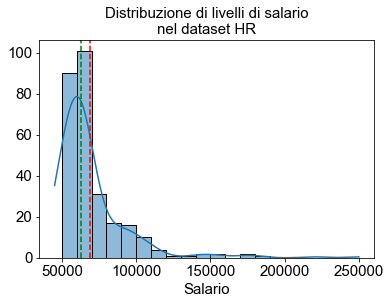

In [11]:
sns.histplot(df['Salary'], kde = True, bins= range(50000,200000,10000), edgecolor ='k') #,kde=False
plt.title("Distribuzione di livelli di salario\nnel dataset HR", fontsize = 15)
plt.xlabel("Salario", fontsize = 15)
sns.set_style("darkgrid")
plt.ylabel('')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.axvline(df['Salary'].median(),color="g",linestyle="--")
plt.axvline(df['Salary'].mean(),color="r",linestyle="--")

plt.show()



Specifichiamo che il range di riferimento per stabilire la larghezza degli intervalli è di 10000. Come risulta evidente, la maggior parte degli impiegati ha un salario concentrato tra 50000 e 70000 dollari annui. Le linee tratteggiate enfatizzano due principali indici di tendenza centrale: la media (69020.70 dollari), evidenziata in rosso, e la mediana (62810 dollari), in verde, più vicina al picco della distribuzione continua della variabile, rappresentata in azzurro sopra l'istogramma. 

Possiamo provare a focalizzare la nostra attenzione sul modo in cui il salario è distribuito in classi specifiche del dataset. La rappresentazione a boxplot consente in primo luogo di evidenziare come valori diversi di salario si distribuiscano per le differenti etnie, ed in secondo luogo consente di individuare valori anomali per la variabile studiata: è interessante evidenziare come i dati che rientrano nell'intervallo tra primo e terzo quartile per l'etnia *White* tendono ad essere distribuiti più uniformemente, se consideriamo la mediana del boxplot di quella categoria, rispetto alle altre due etnie di maggioranza, *Asian* e *Black or African American*. È altrettanto interessante notare come sia proprio *White* l'etnia che presenta il maggior numero di outlier, seguita poi da *Black or African American*.

In [12]:
plt.show()
fig = px.box(df,x = 'Salary', y ='RaceDesc')
fig.show()


In [13]:
white_emp = df[df['RaceDesc'] == 'White']

#utilizziamo in questo caso la funzione boxplot_stats importata  da matplotlib.cbook

a = boxplot_stats(white_emp['Salary'])[0]['fliers'] 
white_outliers = white_emp[white_emp['Salary'].isin(a)]

black_emp = df[df['RaceDesc'] == 'Black or African American']
b = boxplot_stats(black_emp['Salary'])[0]['fliers']
black_outliers = black_emp[black_emp['Salary'].isin(b)]

white_pos = pd.crosstab(white_outliers['RaceDesc'], white_outliers['Position'])
white_sex = pd.crosstab(white_outliers['RaceDesc'], white_outliers['Sex'])
black_pos = pd.crosstab(black_outliers['RaceDesc'], black_outliers['Position'])
black_sex = pd.crosstab(black_outliers['RaceDesc'], black_outliers['Sex'])

display(white_pos, black_pos, white_sex, black_sex)



Position,BI Developer,BI Director,CIO,Data Analyst,Database Administrator,Director of Sales,IT Manager - DB,President & CEO,Principal Data Architect,Shared Services Manager,Software Engineer,Sr. Accountant,Sr. DBA,Sr. Network Engineer
RaceDesc,,,,,,,,,,,,,,
White,2,1,1,2,3,1,1,1,1,1,3,1,1,2


Position,Data Architect,Director of Operations,IT Director,IT Manager - DB,IT Manager - Infra,IT Manager - Support
RaceDesc,,,,,,
Black or African American,1,1,1,1,1,1


Sex,F,M
RaceDesc,,
White,11,10


Sex,F,M
RaceDesc,,
Black or African American,1,5


Le posizioni lavorative ricoperte in maggioranza tra gli outlier del gruppo *White* sono quelle di *Database Administrator* e *Software Engineer*, ma nel gruppo rientra anche colei che ricopre il ruolo di *President & CEO*. Gli outlier del gruppo in questione sono anche uniformemente distribuiti dal punto di vista del genere, con 11 donne e 10 uomini in totale. Al contrario invece, dei 6 outlier che caratterizzano il gruppo *Black or African American*, solo uno è di sesso femminile ed i restanti 5 sono uomini. In questo caso, la maggior parte degli impiegati del gruppo ricopre diversi ruoli identificati sotto la posizione di *IT Manager*.

In [14]:

plt.show()
fig = px.box(df,x = 'Salary', y ='MaritalDesc')
fig.show()



In [15]:
single_emp = df[df['MaritalDesc'] == 'Single']
single_sal = boxplot_stats(single_emp['Salary'])[0]['fliers']
single_outliers = single_emp[single_emp['Salary'].isin(single_sal)]

single_pos = pd.crosstab(single_outliers['MaritalDesc'], single_outliers['RaceDesc'])

mar_emp = df[df['MaritalDesc'] == 'Married']
mar_sal = boxplot_stats(mar_emp['Salary'])[0]['fliers']
mar_outliers = mar_emp[mar_emp['Salary'].isin(mar_sal)]

mar_pos = pd.crosstab(mar_outliers['MaritalDesc'], mar_outliers['RaceDesc'])

display(single_pos, mar_pos)


RaceDesc,Asian,Black or African American,White
MaritalDesc,,,
Single,1,9,5


RaceDesc,Asian,Black or African American,White
MaritalDesc,,,
Married,1,3,4


Può essere interessante visualizzare come il salario si ripartisca rispetto allo stato civile dei singoli impiegati: i boxplot evidenziano come la maggior parte degli outlier si presentino nei due gruppi *Single* e *Married*, i due gruppi più numerosi rispetto alla variabile di riferimento. Notiamo anche che la maggioranza degli outlier per la categoria *Single* è composta da impiegati della categoria *Black or African American*, mentre invece per la categoria *Married* abbiamo una distribuzione più uniforme, con 4 individui appartenenti a *White*, 1 ad *Asian* e 3 ad *Black or African American*. Come osservazione generale, notiamo che la mediana evidenziata per i gruppi *Single*, *Married* e *Widowed* tende ad essere può vicina al valore corrispondente al primo quartile, mentre il fenomeno contrario si presenta con la categoria *Divorced*.

Partendo dai boxplot appena riportati, proseguiamo nello studio dei livelli di salario per diversi impiegati. In particolare, ci focalizziamo sui livelli di salario medio nei due generi rispetto alle diverse etnie riportate nel dataset.

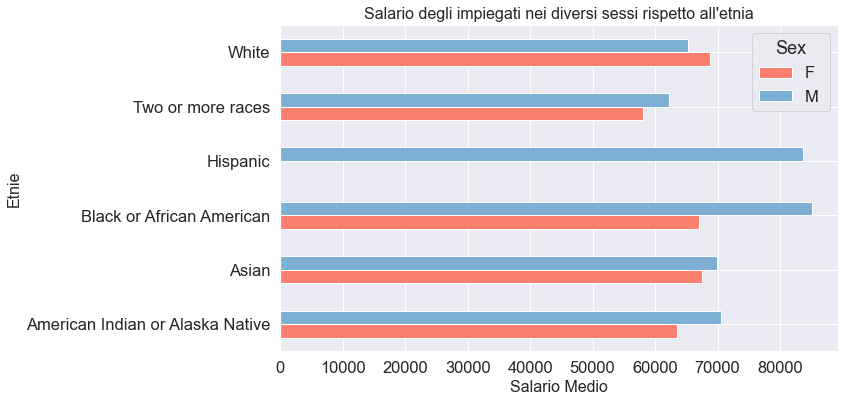

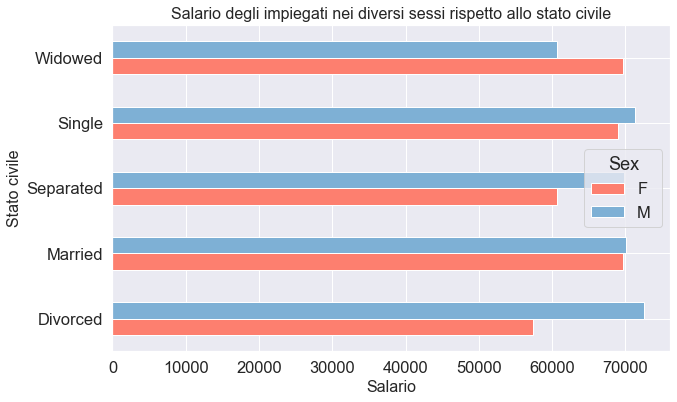

In [16]:
Summary_salary = pd.crosstab(df['RaceDesc'], df['Sex'], values = df['Salary'], aggfunc= np.mean)
Summary_marital = pd.crosstab(df['MaritalDesc'], df['Sex'], values = df['Salary'], aggfunc= np.mean)
palette = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]


plt.rcParams["figure.figsize"] = [10,6]
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16})
sns.set_style("darkgrid")
Summary_salary.plot(kind="barh", stacked=False, color = palette)
plt.title("Salario degli impiegati nei diversi sessi rispetto all'etnia")
plt.ylabel('Etnie')
plt.xlabel('Salario Medio')
plt.xticks(rotation=0)

plt.rcParams["figure.figsize"] = [10,6]
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16})
sns.set_style("darkgrid")
Summary_marital.plot(kind="barh", stacked=False , color = palette)
plt.title("Salario degli impiegati nei diversi sessi rispetto allo stato civile")
plt.ylabel('Stato civile')
plt.xlabel('Salario')

plt.show()

I due barplot riportati mostrano rispettivamente il livello di salario medio considerando in un caso l'etnia e nell'altro lo stato civile. La prima osservazione rilevante che è possibile avanzare è la seguente: per tutte le etnie, escludendo *White*, gli impiegati di sesso maschile hanno uno stipendio medio maggiore di quelli di sesso femminile. La differenza è piuttosto evidente per la categoria *Black or African American*, dove lo stipendio medio femminile equivale a 66963.83 dollari mentre quello maschile è pari a 85066.12. La categoria *Hispanic* presenta invece solo un individuo di sesso maschile ed è quindi l'etnia meno rappresentata nel dataset. Una considerazione analoga si può avanzare quando valutiamo il salario medio rispetto allo stato civile: tranne che per *Widowed*, ogni stato civile presenta al suo interno individui di sesso maschile che hanno un guadagno medio maggiore rispetto agli impiegati di sesso femminile, in particolare il fenomeno è evidente per il gruppo *Divorced*.

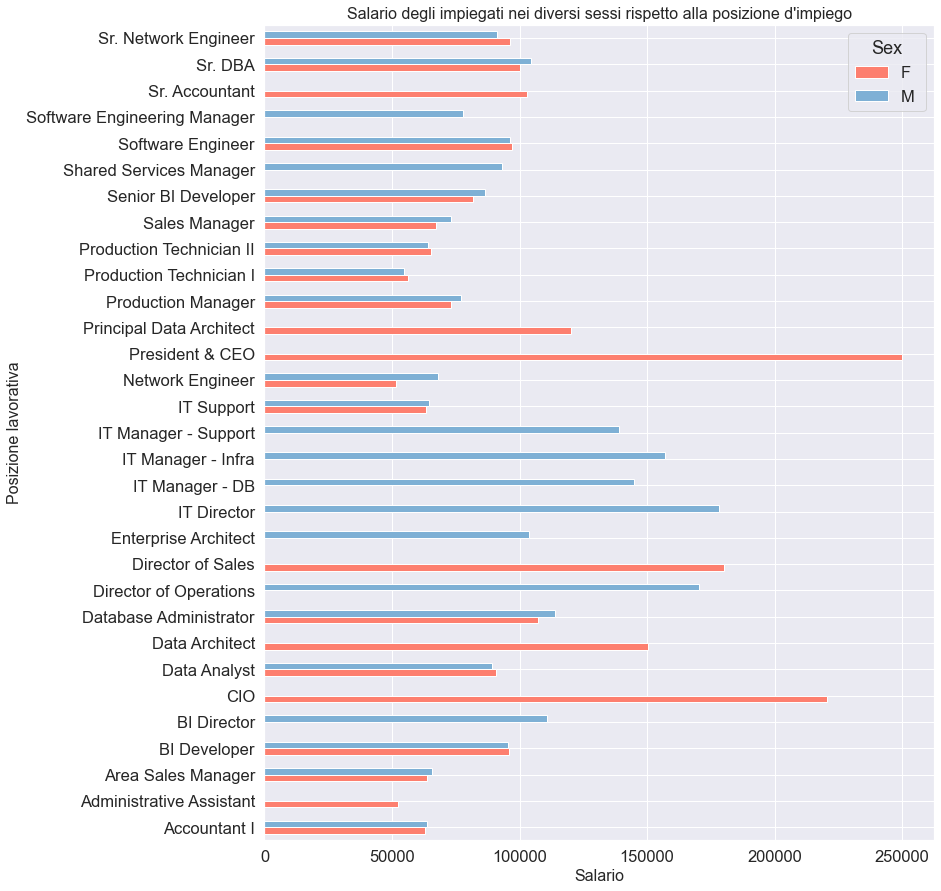

In [17]:
df['Position'] = df['Position'].replace('Data Analyst ', 'Data Analyst')

tabposition = pd.crosstab(df['Position'], df['Sex'], values = df['Salary'], aggfunc= np.mean)
plt.rcParams["figure.figsize"] = [12,15]
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16})
sns.set_style("darkgrid")
tabposition.plot(kind="barh", stacked=False, color = palette )
plt.title("Salario degli impiegati nei diversi sessi rispetto alla posizione d'impiego")
plt.ylabel('Posizione lavorativa')
plt.xlabel('Salario')

plt.show()

Un ulteriore aspetto di interesse è sicuramente il livello di salario percepito a seconda delle diverse posizioni lavorative ricoperte. Risulta evidente che, attraverso il barplot utilizzato, *President & CEO* e *Chief Information Officer*  siano i lavori che prevedono un salario maggiore, entrambe posizioni ricoperte da due impiegati di sesso femminile. Al contrario, è possibile notare che le posizioni di tipo informatico, come tutte quelle relative a *IT Manager*, tendano ad essere ricoperte principalmente da individui di sesso maschile.

Possiamo continuare a focalizzarci sul modo in cui, in percentuale, diversi impiegati di classi differenti per una stessa categoria si distribuiscano rispetto a vari livelli di salario. Abbiamo stabilito 4 intervalli possibili di salario, dividendolo in basso (0-70000), medio-basso [70000-100000), medio-alto [10000 - 150000) e alto [150000, 300000).

In [18]:
sal_bin = []
for i in df['Salary']:
    if i in range(0,70000):
        sal_bin.append('Basso')
    if i in range(70000,100000):
        sal_bin.append('Medio-Basso')
    if i in range(100000,150000):
        sal_bin.append('Medio-Alto')
    if i in range(150000,300000):
        sal_bin.append('Alto')
df['Livello di salario'] = sal_bin

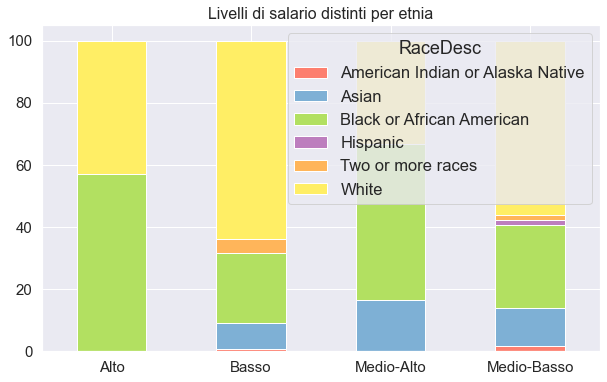

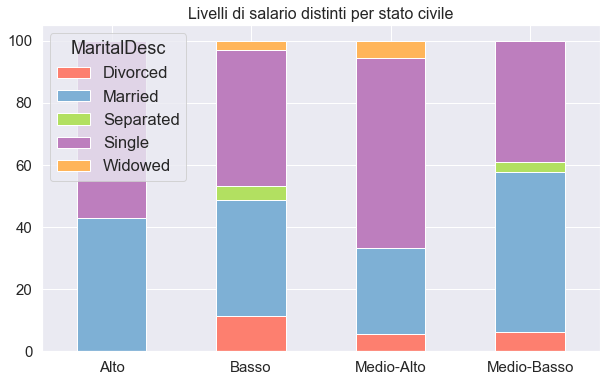

In [19]:
plt.rcParams["figure.figsize"] = [10,6]
sal_race = pd.crosstab(df['Livello di salario'], df['RaceDesc'])
sal_race_pct = sal_race.div(sal_race.sum(1).astype(float), axis=0) * 100
sal_race_pct.plot(kind='bar', stacked=True, 
                    title='Livelli di salario distinti per etnia',
                 color = palette, fontsize = 15)


plt.xticks(rotation=0, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('')

plt.rcParams["figure.figsize"] = [10,6]

sal_mar = pd.crosstab(df['Livello di salario'], df['MaritalDesc'])
sal_mar_pct = sal_mar.div(sal_mar.sum(1).astype(float), axis=0) * 100
sal_mar_pct.plot(kind='bar', stacked=True, 
                    title='Livelli di salario distinti per stato civile',
                color = palette, fontsize = 15)

plt.xticks(rotation=0, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('')

plt.show()

È subito possibile evidenziare come fasce di reddito alte o medio-alte escludano etnie di minoranza del dataset, quali *Two or more races*, *Hispanic* ed *American Indian or Alaska Native*. In particolare, una percentuale consistente dei salari alti è assegnata ad impiegati del gruppo *Black or African American* e lo stesso per salari medio-alti, anche se questi includono un numero consistente di membri di etnia *Asian* e *White*.

Il secondo barplot evidenzia invece come gli impiegati *Single* tendano a ricoprire una percentuale maggiore dei salari alti rispetto agli impiegati *Married*. In questo caso la classe *Widowed* per la variabile *MaritalDesc* è esclusa da un alto salario, composto principalmente da persone appartenenti alle classi *Married* e *Single*.

# Analisi della Performance

Successivamente spostiamo il nostro focus analizzando la Performance di ogni persona presente nel nostro dataset. Fonte di interesse sarà comprendere come le altre variabili si dividono nelle diverse performance attraverso l'utilizzo di barplot. Per avere una più chiara rappresentazione della variabile *PerformanceScore* al quale faremo riferimento è stato utilizzato un pie chart.

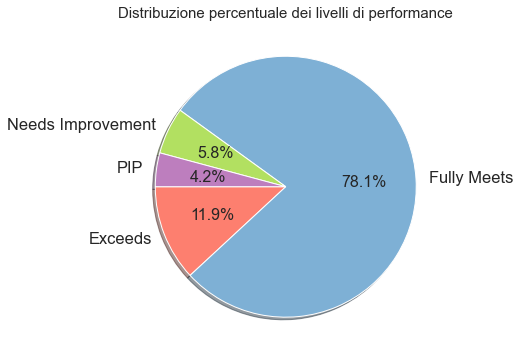

In [20]:
palette = ["#fd7f6f", "#7eb0d5", "#b2e061", "#bd7ebe", "#ffb55a", "#ffee65", "#beb9db", "#fdcce5", "#8bd3c7"]

perf = list(df['PerformanceScore'].unique())

labels_perf = perf
sizes_perf = [len(df[df['PerformanceScore'] == x]) for x in perf ]

plt.pie(sizes_perf, labels = labels_perf, autopct = '%1.1f%%', shadow = True, startangle = 180, colors = palette)
plt.title('Distribuzione percentuale dei livelli di performance', fontsize = 15)
plt.show()

Attraverso l'utilizzo del grafico è possibile osservare che la variabile è composta da 4 diversi livelli di performance: *PIP, Needs Improvement, Fully Meets, Exceeds*.  I primi due livelli menzionati possono definirsi i più "bassi", ovvero con un grado di performance non ottimale e, come visibile dalle diverse percentuali presenti sul grafico, sono anche quelli in minoranza con una percentuale di 4,18% per *PIP* ed una percentuale di 5,79% per *Needs Improvement*.
Il livello di performance che prevale sugli altri è evidentemente il *Fully Meets* presente in una percentuale del 78,18%, implicando che la maggior parte degli impiegati si impegna nel proprio lavoro con una performance sufficiente per gli standard imposti dall'azienda. Infine, possiamo vedere che soltanto l'11,90% delle persone presenti nel dataset eccede nel proprio lavoro.

Una volta visualizzata in percentuale la composizione della variabile *PerformanceScore*, si possono utilizzare dei barplot per osservare come altre variabili presenti nel dataset si dividono a seconda dei diversi livelli di performance precedentemente menzionati.

In [21]:
tab = pd.crosstab(df['PerformanceScore'], df['Sex'])
tab2 = pd.crosstab(df['PerformanceScore'], df['MaritalDesc'])
tab3 = pd.crosstab(df['PerformanceScore'], df['RaceDesc'])  
 

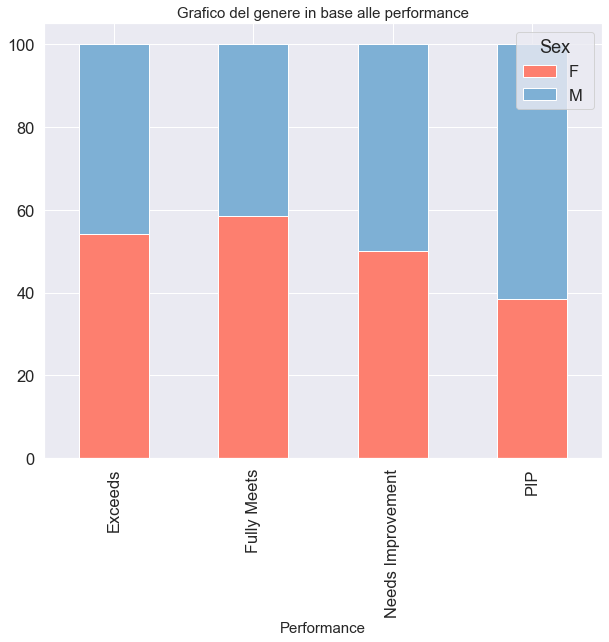

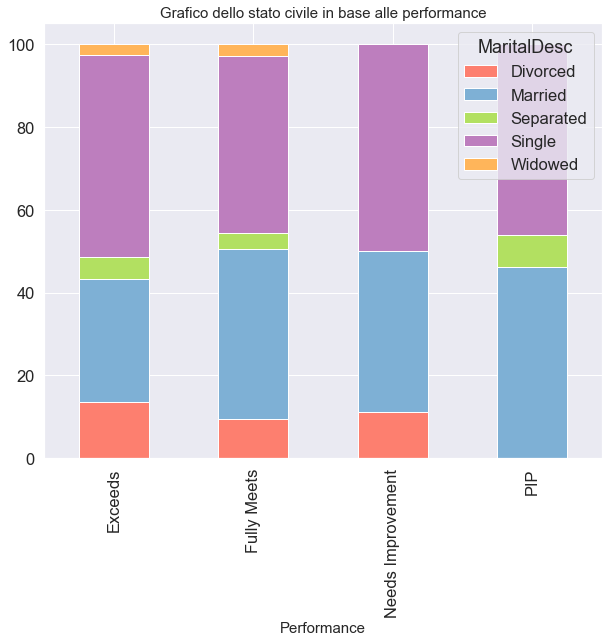

In [22]:




plt.rcParams["figure.figsize"] = [10,8]
tab =  tab.div(tab.sum(1).astype(float), axis=0) * 100
tab.plot(kind="bar",stacked=True, color = palette) 
plt.title("Grafico del genere in base alle performance", fontsize = 15)
plt.ylabel("")
plt.xlabel("Performance", fontsize = 15)
plt.show()

plt.rcParams["figure.figsize"] = [10,8]
tab2 =  tab2.div(tab2.sum(1).astype(float), axis=0) * 100
tab2.plot(kind="bar",stacked=True, color = palette) 
plt.title("Grafico dello stato civile in base alle performance", fontsize = 15)
plt.ylabel("")
plt.xlabel("Performance", fontsize = 15)
plt.show()


Attraverso l'utilizzo di crosstab, sono stati creati due diversi barplot: nel primo viene visualizzata la composizione delle diverse tipologie di performance in base al sesso, rendendo visibile una parità di genere quasi in ogni livello di performance, con una presenza lievemente maggiore di individui di sesso femminile nelle classi *Exceeds* e *Fully Meets*, e una presenza lievemente maggiore di individui di sesso maschile nella classe *PIP*. Il grafico ci potrebbe dunque portare a dedurre che in media le donne tendono ad impegnarsi maggiormente degli uomini, ma bisogna anche tenere da conto che le classi *F* e *M* della variabile *Sex* siano presenti in forma sbilanciata dal momento che il numero degli individui di sesso femminile supera quello degli individui di sesso maschile.
Nel secondo barplot, invece, viene visualizzato come la variabile *MaritalDesc* si suddivide nei diversi livelli di performance. Risulta evidente che le classi *Single* e *Married* prevalgono in tutti i livelli di performance, con un'elevata presenza in *Fully Meets* e *Exceeds*, probabilmente derivante dal fatto che le persone sposate possiedono spesso famiglia e dunque non possono rischiare di perdere il lavoro o guadagnare poco. Allo stesso modo le persone single, non avendo ulteriori distrazioni, tendono a focalizzarsi spesso sul lavoro.

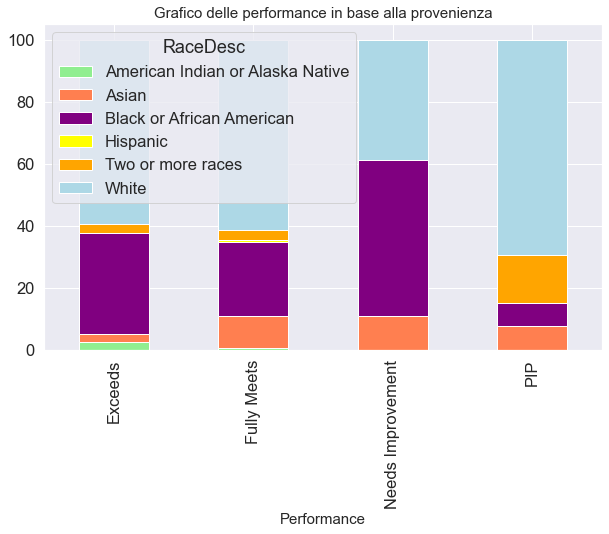

In [23]:
plt.rcParams["figure.figsize"] = [10,6]
tab3 =  tab3.div(tab3.sum(1).astype(float), axis=0) * 100
tab3.plot(kind="bar",stacked=True, color=['lightgreen','coral', 'purple', 'yellow', 'orange', 'lightblue']) 
plt.title("Grafico delle performance in base alla provenienza", fontsize = 15)
plt.ylabel("")
plt.xlabel("Performance", fontsize = 15)
plt.show()


Infine, un terzo barbplot è stato creato al fine di osservare come le diverse etnie si suddividono a seconda della performance: il grafico mostra una presenza elevata della categoria *White* nella maggior parte dei diversi livelli di performance. In particolar modo si osserva un gran numero di persone di etnia *Black or African American*, *White* e *Asian* nel livello di performance *Fully Meets* ed un gran numero di persone di etnia *Black or African American* e *White* nei livelli di performance *Exceeds* e *Needs Improvement*. Le persone appartenenti alla categoria *Two or more races* sono invece presenti in piccola parte in ogni categoria di performance.

# Analisi delle Assenze

Un'ulteriore variabile numerica d'interesse è il numero di assenze compiuto da ogni impiegato all'interno dell'azienda. Come già proposto per il salario, visualizziamo prima la distribuzione dei valori della variabile sfruttando un istogramma, per poi concentrarci sul rapporto di quest'ultima con altre features categoriche del dataset. 

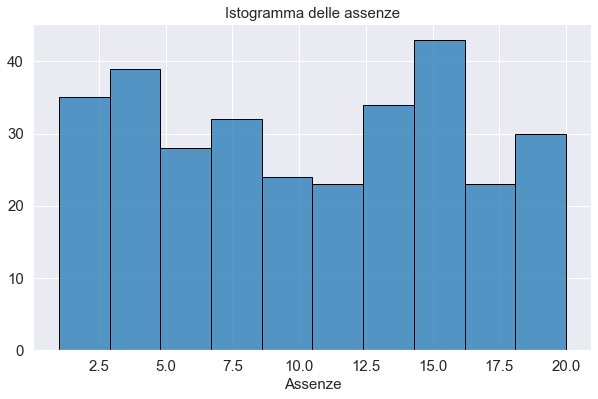

In [24]:
plt.figure(figsize=(10,6)) 
sns.histplot(df['Absences'], edgecolor = 'k')
sns.set_style("darkgrid")
plt.title("Istogramma delle assenze", fontsize = 15)
plt.xlabel("Assenze", fontsize = 15)
plt.ylabel("")
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

La distribuzione presenta un picco maggiore per l'intervallo di assenze tra 15 e 17 ed un picco minore è risconrabile tra le 2.5 e le 5 assenze. Diventa quindi interessante comprendere quali possano essere le relazioni tra il numero di assenze ed altre categorie del dataset. Ad esempio, il box-plot riportato in basso evidenzia come le assenze si distribuiscono rispetto a livelli diversi di soddisfazione.

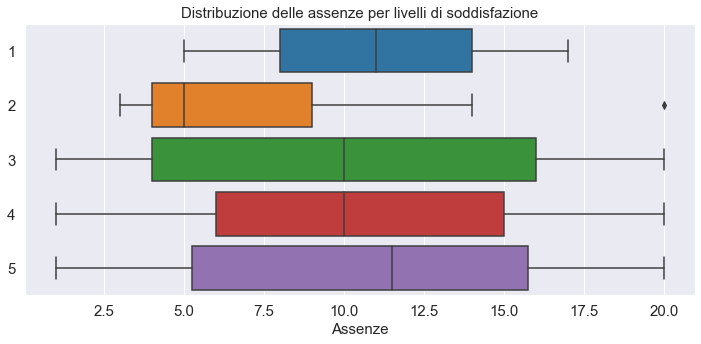

In [25]:
plt.figure(figsize=(12,5)) 
#sns.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":12})
sns.boxplot(x = 'Absences', y ='EmpSatisfaction',  data=df, orient='h')
plt.title("Distribuzione delle assenze per livelli di soddisfazione", fontsize = 15)
plt.ylabel('')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Assenze", fontsize = 15)

plt.show()


In [26]:
empsat_2= df[df['EmpSatisfaction'] == 2]
emp_abs = boxplot_stats(empsat_2['Absences'])[0]['fliers']

emp_outliers = empsat_2[empsat_2['Absences'].isin(emp_abs)]
emp_pos = pd.crosstab(emp_outliers['EmpSatisfaction'] , emp_outliers['Position'])

display(emp_pos)


Position,Production Technician I
EmpSatisfaction,
2,1


È invece interessante notare come il box-plot per il livello "2" di soddisfazione presenti una mediana sbilanciata verso il primo quartile, con un solo outlier individuato, un impiegato che ricopre la posizione di Production Technician I.

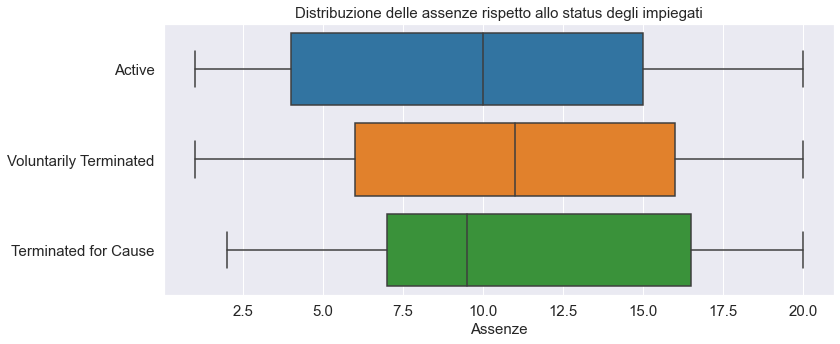

In [27]:
plt.figure(figsize=(12,5)) 
#sns.set_context("notebook", font_scale=1.5, rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":12})
sns.boxplot(x = 'Absences', y ='EmploymentStatus',  data=df, orient='h')
plt.title("Distribuzione delle assenze rispetto allo status degli impiegati", fontsize = 15)
plt.ylabel('')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("Assenze", fontsize = 15)

plt.show()

Una seconda osservazione interessante può essere fatta considerando i livelli di assenza rispetto allo status degli impiegati. Come è ragionevole pensare, gli impiegati licenziati per una causa precisa presentano un terzo quartile di un valore leggermente maggiore rispetto a quello degli impiegati attivi. Analogamente, il valore del primo quartile per gli impiegati licenziati è discretamente maggiore rispetto al valore per gli impiegati attivi. Anche in questo contesto possiamo approfondire l'analisi considerando la media delle assenze compiute da impiegati di diverse categorie: in particolare ci concentriamo sulle assenze compiute dagli impiegati in base allo status di assunzione e alla loro performance sul lavoro.

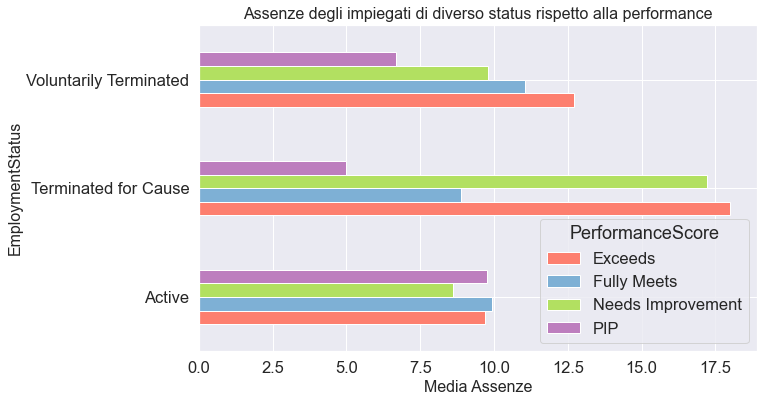

In [28]:
tabassenze1 = pd.crosstab(df['EmploymentStatus'], df['PerformanceScore'], values = df['Absences'], aggfunc= np.mean)

plt.rcParams["figure.figsize"] = [10,6]
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16})
sns.set_style("darkgrid")
tabassenze1.plot(kind="barh", stacked=False, color = palette)
plt.title("Assenze degli impiegati di diverso status rispetto alla performance")

plt.xlabel('Media Assenze')
plt.xticks(rotation=0)


plt.show()

Ci sono alcuni punti degni di nota che emergono dal barplot: è interessante notare come gli impiegati licenziati presentino due picchi nella media delle assenze per le classi Needs Improvement ed Exceeds, mentre invece gli impiegati che presentano una performance molto bassa e sono stati licenziati presentano una media di assenze particolarmente bassa. Inoltre, c'è un unico impiegato che eccede i livelli di performance ma è stato licenziato per ragioni di "gross misconduct", mentre invece gli impiegati con performance sufficienti che hanno subito il licenziamento lo hanno ricevuto in maggioranza per ragioni legate alla presenza sul lavoro. 



In [29]:
emp_termd = df[(df['EmploymentStatus'] == 'Terminated for Cause')]
emp_termd_exc = emp_termd[emp_termd['PerformanceScore'] == 'Exceeds']
emp_termd_exc[['Employee_Name','TermReason']]

,Employee_Name,TermReason
293,"Volk, Colleen",gross misconduct


In [30]:
df[df['Employee_Name'] == 'Volk, Colleen' ]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Livello di salario
293,"Volk, Colleen",10022,1,1,0,4,5,4,0,49773,...,18.0,Google Search,Exceeds,4.3,5,0,2/1/2015,0,18,Basso


Un ulteriore focus riguarda le assenze compiute dagli impiegati in base al dipartimento di lavoro e alla loro performance sul lavoro.

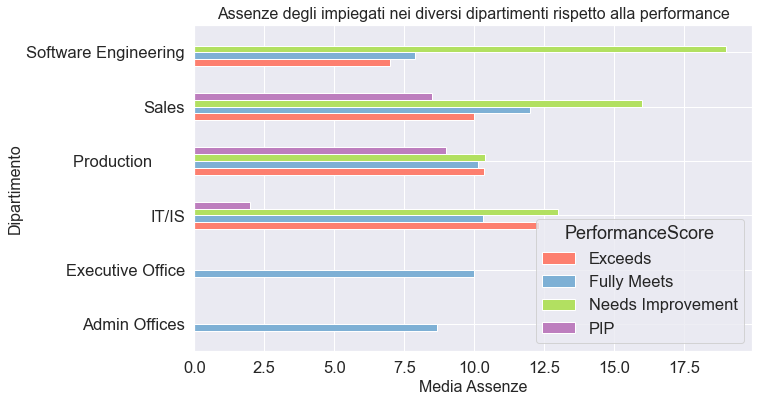

In [31]:
tabassenze2 = pd.crosstab(df['Department'], df['PerformanceScore'], values = df['Absences'], aggfunc= np.mean)

plt.rcParams["figure.figsize"] = [10,6]
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16})
sns.set_style("darkgrid")
tabassenze2.plot(kind="barh", stacked=False, color = palette)
plt.title("Assenze degli impiegati nei diversi dipartimenti rispetto alla performance")
plt.ylabel('Dipartimento')
plt.xlabel('Media Assenze')
plt.xticks(rotation=0)

plt.show()


Il barplot sopra riportato, mostra un maggior numero di assenze nel dipartimento di *Software Engineering* e *Sales*, in entrambi i casi le assenze nelle due categorie appartengono al livello di performance *Needs Improvement*. Un elevato numero di assenze è presente anche nella categoria di performance *Exceeds* per quanto riguarda il dipartimento di *IT/IS*, mostrando come un gran numero di assenze non sia obbligatoriamente correlato ad un calo di performance.

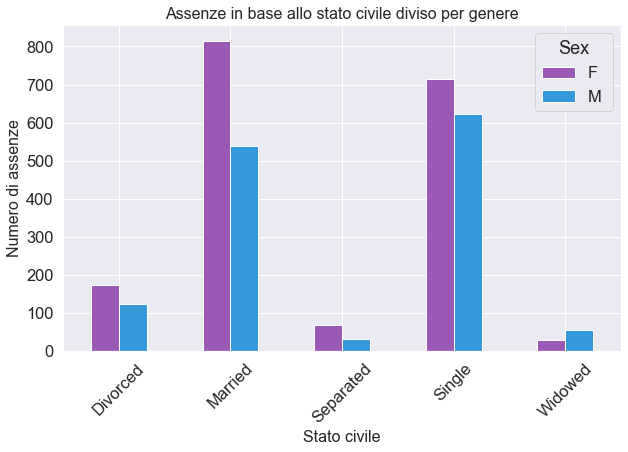

In [32]:
tab2 = pd.crosstab(df['MaritalDesc'], df['Sex'], values=df['Absences'], aggfunc=np.sum)

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
plt.rcParams["figure.figsize"] = [10,6]
sns.set_context("notebook", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16})
sns.set_style("darkgrid")
tab2.plot(kind="bar", stacked=False,color=flatui)
plt.title('Assenze in base allo stato civile diviso per genere')
plt.ylabel('Numero di assenze')
plt.xlabel('Stato civile')
plt.xticks(rotation=45)

plt.show()


In [33]:
Absencesgender = df["Absences"].groupby(df['Sex']).sum()
display(Absencesgender)

Sex
F     1806
M     1378
Name: Absences, dtype: int64

In conclusione è stato plottato un ultimo grafico riguardante il numero di assenze a seconda del sesso e dello stato matrimoniale. Il grafico mostra un maggior numero di assenze da parte di individui di sesso femminile nelle classi di maggioranza dello stato civile, *Single* e *Married*, probabilmente dovuto al fatto che le donne tendono maggiormente ad occuparsi dei figli o potrebbero avere più assenze dovute ad un periodo di maternità.

# Correlazione di Pearson 

Una volta osservate ed analizzate le features per noi di maggiore interesse, è importante osservare se e in quale modo le features presentano tra loro una correlazione. Per stabilire il rapporto lineare tra coppie di variabili, utilizziamo il coefficiente di correlazione di *Pearson*:

$$r =
  \frac{ \sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{%
        \sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}$$
       
       
La heatmap visualizzata in basso prende in considerazione un sottoinsieme delle variabili originali del dataset, considerando le features numeriche e continue.

In [34]:
df_int = df[["Salary", "SpecialProjectsCount" ,"Absences", "EngagementSurvey", "DaysLateLast30"]]

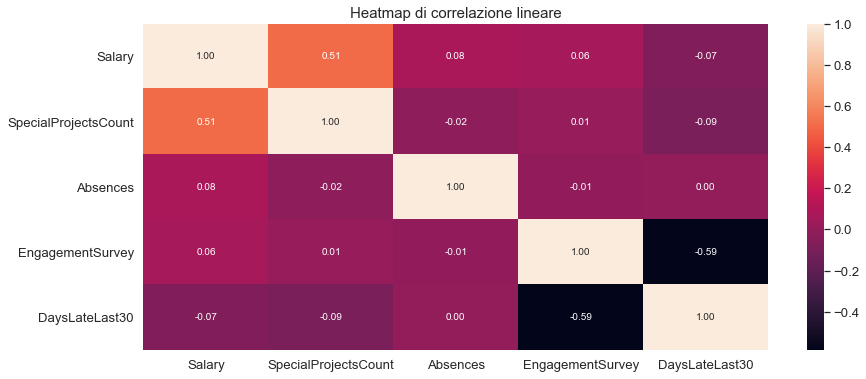

In [35]:
plt.rcParams["figure.figsize"]=[14,6]
sns.set_context("notebook", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap(df_int.corr(), annot=True, fmt=".2f")
plt.title("Heatmap di correlazione lineare", fontsize = 15)

plt.show()


Attraverso l'heatmap sopra riportata, è possibile osservare la correlazione tra le variabili scelte: come visibile dalla mappa la correlazione tra le variabili *Absences* e *Salary* e *Absences* e *SpecialProjectsCount* risulta essere notevolmente bassa, con un indice di correlazione pari a 0.08 e 0.02. L'indice di correlazione positivo più alto è dato dalle variabili *Salary* e *SpecialProjectsCount* con un valore di 0.51, mentre una correlazione negativa interessante è riscontrabile tra *EngagementSurvey* e *DaysLateLast30* con un indice pari a -0.59.

Prima di passare all'analisi delle correlazioni più interessanti tra le coppie di variabili prese in esame, corrediamo la heatmap con una rappresentazine tramite pair plot. Come i coefficienti di correlazione riportati in precedenza suggeriscono, non ci sono rilevanti correlazioni lineari evidenti negli scatter plot in figura. A partire da queste considerazioni, ci concentriamo in ogni caso sul rapporto tra le due coppie di variabili continue aventi un migliore indice di correlazione, ovvero  *SpecialProjectCount* e *Salary* e *DaysLateLast30* e *EngagementSurvey*.

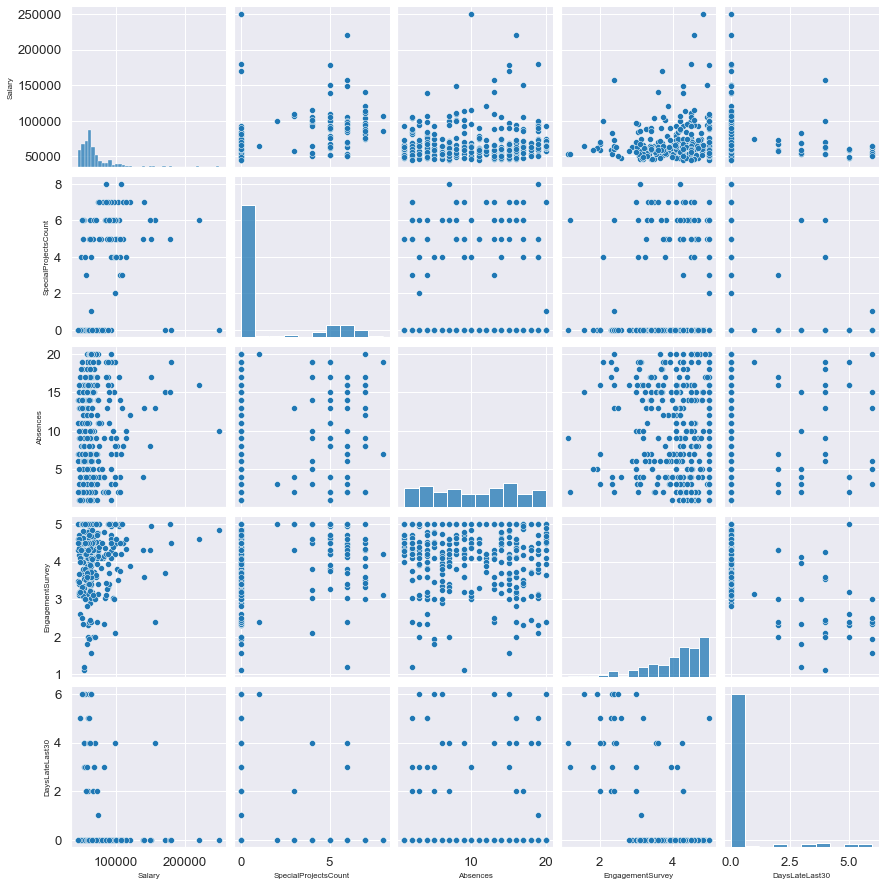

In [36]:
sns.pairplot(df_int)
plt.show()

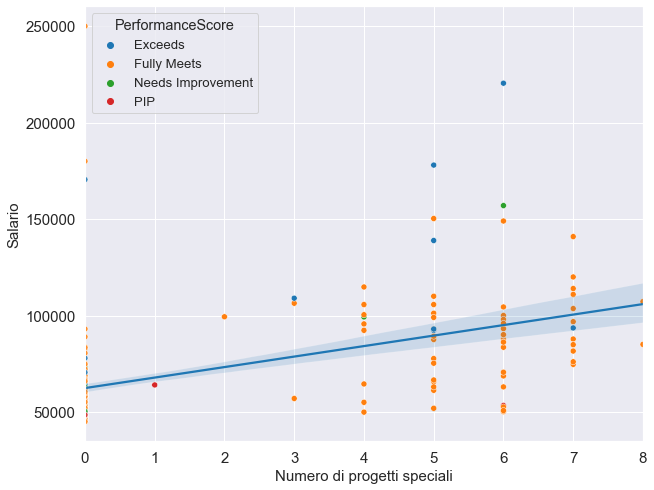

In [37]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x=(df['SpecialProjectsCount']), y=(df['Salary']), hue='PerformanceScore', data=df)
sns.regplot(x="SpecialProjectsCount", y="Salary", fit_reg=True, data=df, scatter = False) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Numero di progetti speciali', fontsize = 15)
plt.ylabel('Salario', fontsize = 15)
plt.show()

Lo scatter plot evidenzia una quantità consistente di impiegati dal salario basso non coinvolti in alcun progetto speciale; allo stesso tempo notiamo due impiegati coinvolti in 8 progetti ma con un salario relativamente inferiore rispetto a numerosi altri impiegati che hanno partecipato a meno progetti. Evidenziamo in ultimo come la maggioranza degli impiegati che hanno preso parte a 2 o più progetti speciali presentino un punteggio di performance sufficiente e ci siano solo pochi di questi per i quali è necessario un miglioramento. La retta di regressione costruita all'interno dello scatter plot  mostra una tendenza lineare, ma non approssima in modo soddisfacente la loro distribuzione.

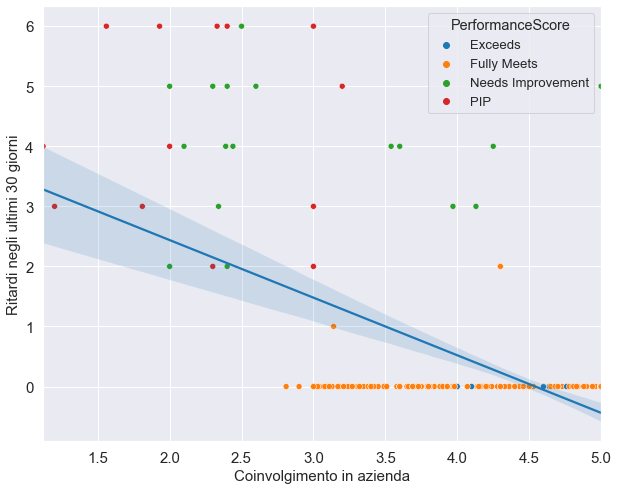

In [38]:
plt.figure(figsize=[10, 8])
sns.scatterplot(x=(df['EngagementSurvey']), y=(df['DaysLateLast30']), hue='PerformanceScore', data=df)
sns.regplot(x="EngagementSurvey", y="DaysLateLast30", fit_reg=True, data=df, scatter = False) 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Coinvolgimento in azienda', fontsize = 15)
plt.ylabel('Ritardi negli ultimi 30 giorni', fontsize = 15)
plt.show()

Lo scatter plot evidenzia bene la correlazione negativa specificata dal coefficiente di *Pearson* tra la variabile *EngagementSurvey* e *DaysLateLast30*. Il risultato è intuitivamente ragionevole: ci aspettiamo che impiegati più coinvolti all'interno dell'azienda tendano a non presentarsi in ritardo rispetto ad impiegati meno coinvolti. Lo scatterplot mette in luce anche una relazione interessante con una terza variabile, il punteggio degli impiegati: tutti gli impiegati che hanno fatto ritardo a lavoro 3 o più volte negli ultimi 30 giorni presentano punteggi di performance inferiori alla sufficienza, ed è evidente come in particolare gli impiegati con un livello di coinvolgimento minore di 2.0 abbiano il più basso punteggio di performance. Per quanto riguarda la retta di regressione, è evidenziata una relazione di tendenza negativa tra i dati ma, per il modo in cui i valori si distribuiscono nel plot, anche in questo caso la retta non dà un'idea soddisfacente del rapporto negativo tra le due features considerate. 

# Elementi di statistica descrittiva

In [39]:
df_int.describe()

,Salary,SpecialProjectsCount,Absences,EngagementSurvey,DaysLateLast30
count,311.000000,311.000000,311.000000,311.000000,311.000000
mean,69020.684887,1.218650,10.237942,4.110000,0.414791
std,25156.636930,2.349421,5.852596,0.789938,1.294519
min,45046.000000,0.000000,1.000000,1.120000,0.000000
25%,55501.500000,0.000000,5.000000,3.690000,0.000000
50%,62810.000000,0.000000,10.000000,4.280000,0.000000
75%,72036.000000,0.000000,15.000000,4.700000,0.000000
max,250000.000000,8.000000,20.000000,5.000000,6.000000


A quelli che sono i principali indici statistici specificati dalla funzione .describe() aggiungiamo anche il valore corrispondente alla *Mean Absolute Deviation* (MAD), alla varianza campionaria e all'errore standard della media per ogni variabile analizzata.

In [40]:
print('Valori di Mean Absolute Deviation')
print(df_int.mad(), end = '\n\n')
print('Valori della varianza campionaria')
print(df_int.var(), end = '\n\n')
print("Valori dell'errore standard della media")
print(df_int.sem())

Valori di Mean Absolute Deviation
Salary                  15729.230612
SpecialProjectsCount        1.890117
Absences                    5.174243
EngagementSurvey            0.611768
DaysLateLast30              0.741556
dtype: float64

Valori della varianza campionaria
Salary                  6.328564e+08
SpecialProjectsCount    5.519780e+00
Absences                3.425288e+01
EngagementSurvey        6.240013e-01
DaysLateLast30          1.675781e+00
dtype: float64

Valori dell'errore standard della media
Salary                  1426.502008
SpecialProjectsCount       0.133223
Absences                   0.331870
EngagementSurvey           0.044793
DaysLateLast30             0.073405
dtype: float64


In [41]:
trenta_percento_media = df_int.mean() * 30 / 100
for i in range(0,len(trenta_percento_media)):
    if df_int.std()[i] <= trenta_percento_media[i]:
        print('La deviazione standard di ' + df_int.columns[i] + ' è inferiore al 30% della media')
    else:
        print('La deviazione standard di ' + df_int.columns[i] + ' è superiore al 30% della media')



La deviazione standard di Salary è superiore al 30% della media
La deviazione standard di SpecialProjectsCount è superiore al 30% della media
La deviazione standard di Absences è superiore al 30% della media
La deviazione standard di EngagementSurvey è inferiore al 30% della media
La deviazione standard di DaysLateLast30 è superiore al 30% della media


Per valutare l'affidabilità o meno della media della distribuzione, consideriamo la seguente euristica: se la deviazione standard della distribuzione è inferiore al 30% del valore della media, giudicheremo affidabile il valore medio della distribuzione. In caso contrario verrà valutato come non rappresentativo.
Dai calcoli si può concludere che solo per "EngagementSurvey" abbiamo una valore medio affidabile. Negli altri casi quindi si potrebbe optare per scegliere la mediana come valore centrale rappresentativo della distribuzione (evidenziamo come già nell'istogramma del salario si rendeva evidente come la mediana fosse più vicina al picco della distribuzione rispetto alla media)

Utilizzando la misura statistica *Kurtosis* è possibile, inoltre, sapere quanto è alto e acuto il picco della distribuzione, applichiamo dunque sulle colonne già precedentemente prese in considerazione il comando *.kurt()*

In [42]:
print('Risultati test di Kurtosis')
print(df_int.kurt())


Risultati test di Kurtosis
Salary                  15.452149
SpecialProjectsCount     0.641415
Absences                -1.301962
EngagementSurvey         1.164560
DaysLateLast30           8.830523
dtype: float64


È evidente come i valori risultanti dal test per *Salary* e *DaysLateLast30* siano eccessivamente alti e suggeriscano una distribuzione fortemente pronunciata verso l'alto, tutt'altro che normale.

Per *EngagementSurvey* ci aspetteremmo un comportamento analogo, ma meno pronunciato dei due precedenti. *Abscences* presenta invece una tendenza opposta, potremmo prevedere una campana maggiormente schiacciata, mentre *SpecialProjectsCount* è il valore più equilibrato, che maggiormente si avvicina allo zero.

In [43]:
print('Valori di skewness della distribuzione')
print(df_int.skew(), end = '\n\n')

Valori di skewness della distribuzione
Salary                  3.306181
SpecialProjectsCount    1.539271
Absences                0.029283
EngagementSurvey       -1.116979
DaysLateLast30          3.143468
dtype: float64



Anche per la skewness della curva è possibile avanzare alcune osservazioni: per *Absences* abbiamo un ottimo valore di inclinazione, i dati si distribuiscono in modo abbastanza simmetrico, a differenza di *DaysLateLast30* e *Salary* che presentano valori particolarmente alti per i quali ci aspetteremmo un forte sbilanciamento a favore della porzione della distribuzione con valori minori. Analogamente, *SpecialProjectsCount* presenta una moderata distorsione dei dati verso valori bassi, mentre *EngagementSurvey* una moderata distorsione verso valori più alti. 
Per una migliore comprensione delle conclusioni tratte fino ad adesso, visualizziamo le cruve di distribuzione di ciasuna colonna presa in considerazione.

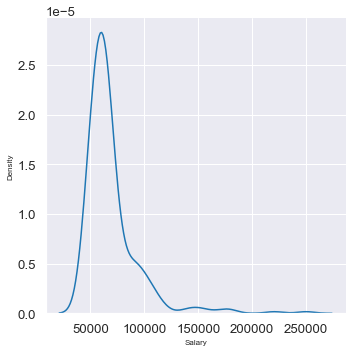

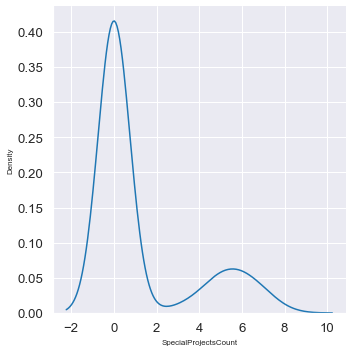

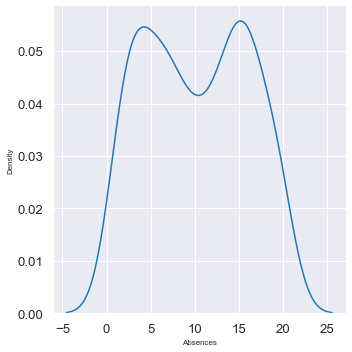

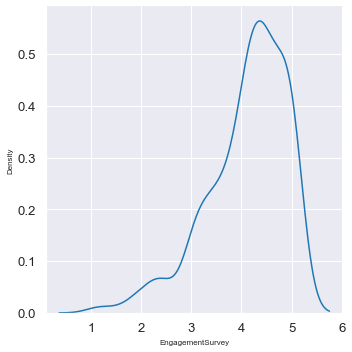

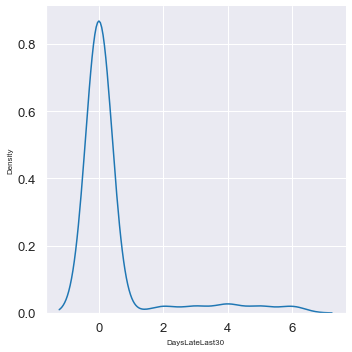

In [44]:
for i in df_int.columns:
    sns.displot(df_int[i], kind="kde")

In generale, in nessun caso possiamo parlare di completa distribuzione normale: anche se alcune variabili presentano un basso livello di Kurtosis, non vantano invece valori soddisfacenti per l'inclinazione della curva e viceversa. Per valutare dunque il livello di correlazione tra le variabili occorrerebbe prediligere test di correlazione non parametrici.

Riportiamo quindi due heat-map calcolate utilizzando il coefficiente di correlazione di Spearman e di Kendall.

In [45]:
'''plt.rcParams["figure.figsize"]=[14,6]
sns.set_context("notebook", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap(df_int.corr('spearman'), annot=True, fmt=".2f", cmap= 'YlGnBu')
plt.title("Heatmap calcolata con coefficiente di Spearman", fontsize = 15)

plt.show()'''

fig = px.imshow(round(df_int.corr('spearman'),2), text_auto = True, width=800, height=600 , color_continuous_scale='YlGnBu',
               title = "Heatmap calcolata con coefficiente di Spearman")

fig.show()


Anche valutando il coefficiente di correlazione di Spearman risultano evidenti la correlazione positiva tra *SpecialProjectsCount* e *Salary* e la correlazione negativa, questa volta con un valore di correlazione leggermente minore rispetto a quanto riportato con Pearson, tra *DatsLateLast30* ed *EngagementSurvey*. Potremmo aspettarci che le valutazioni introdotte in questo caso siano leggermente più affidabili rispetto a quanto riportato nella heat-map considerando il coefficiente di Pearson, data la tendenziale non-normalità delle variabili e la maggior robustezza del coefficiente di Spearman rispetto agli outlier delle distribuzioni.

In [46]:
''''plt.rcParams["figure.figsize"]=[14,6]
sns.set_context("notebook", font_scale=1.2, rc={"font.size":10,"axes.titlesize":10,"axes.labelsize":8})
sns.heatmap(df_int.corr('kendall'), annot=True, fmt=".2f")
plt.title("Heatmap calcolata con coefficiente di Kendall", fontsize = 15)

plt.show()'''


fig = px.imshow(round(df_int.corr('kendall'),2), text_auto = True, width=800, height=600 , color_continuous_scale='YlGnBu',
               title = "Heatmap calcolata con coefficiente di Kendall")

fig.show()


Il coefficiente di correlazione di Kendall invece mostra risultati che si discostano fortemene da quelli analizzati precedentemente. In primo luogo, enfatizza una correlazione lievemente negativa tra *SpecialProjectsCount* e *Salary*, contrariamente a quanto riportano le due heat-map sopra riportate. Dall'altro lato, stabilisce correlazioni negative per un numero maggiore di coppie di variabili rispetto a quanto non presentino i coefficienti di Pearson e Spearman. In primo luogo, enfatizza una anti-correlazione quasi perfetta tra *EngagementSurvey* e *DaysLateLast30* (ci aspetteremmo allora che il ranking di una variabile è quasi completamente opposto al ranking dell'altra), mentre proprio quest'ultima variabile risulta essere fortemente correlata negativamente con le restanti features quantitative. Tenendo conto degli scatter plot calcolati in precedenza, non sembra essere legittimo reputare il coefficiente di Kendall affidabile per le valutazioni di anti-correlazione tra quelle coppie di variabili, con valori eccessivamente elevanti rispetto a quanto presentato graficamente.

## Valutazione percentili e Outliers

Proseguiamo approfondendo il calcolo dei percentili per le variabili quantitative e sfruttiamo il range interquartile per valutare potenziali outlier delle distribuzioni: dividiamo gli outlier individuati in *upper-outliers* (che assumono, rispetto al 3° quartile, un valore maggiore di 1.5 volte il range interquartile) e *lower-outliers* (che assumono, rispetto al 1° quartile, un valore minore di 1.5 volte il range interquartile).

In [47]:
df_upper = {}
df_lower = {}
df_normal = {}
for i in df_int.columns:
    Q1 = df_int[i].quantile(0.25, interpolation='linear')
    Q3 = df_int[i].quantile(0.75, interpolation='linear')
    IQR = Q3-Q1
    Lowerfence = Q1 - 1.5*IQR
    Upperfence = Q3 + 1.5*IQR
    up_OUTLIERS = df.loc[(df[i] > Upperfence) ]
    low_OUTLIERS = df.loc[(df[i] < Lowerfence)]
    NORMAL = df.loc[(df[i] > Lowerfence)  & (df[i] < Upperfence) ]
    df_upper[i] = up_OUTLIERS
    df_lower[i] = low_OUTLIERS
    df_normal[i] = NORMAL
    
    
    
print('Il numero di upper-outliers nelle variabili quantitative è rispettivamente:')
for i in df_int.columns:
    print( i + ': ' + str(len(df_upper[i])))
    
print('\n')    

print('Il numero di lower-outliers nelle variabili quantitative è rispettivamente:')
for i in df_int.columns:
    print( i + ': ' + str(len(df_lower[i])))
    

Il numero di upper-outliers nelle variabili quantitative è rispettivamente:
Salary: 29
SpecialProjectsCount: 70
Absences: 0
EngagementSurvey: 0
DaysLateLast30: 33


Il numero di lower-outliers nelle variabili quantitative è rispettivamente:
Salary: 0
SpecialProjectsCount: 0
Absences: 0
EngagementSurvey: 9
DaysLateLast30: 0


L'unica variabile che non presenta alcun tipo di outlier, considerando il range interquartile, è *Absences*. Per il resto, notiamo come la maggior parte degli outlier per le altre features, escludendo *EngagementSurvey*, si concentrino oltre il terzo quartile.

Considerando l'impatto che gli outlier presentano su indici di tendenza centrale come media e deviazione standard, proviamo a vedere in che modo questi due indici variano per le due variabili quantitative analizzate in precedenza.

In [48]:
df_normal['Salary'].describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,274.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,10158.177305,0.400709,0.833333,0.432624,2.400709,4.758865,2.964539,0.085106,62841.645390,0.333333,16.890071,6995.510638,15.470803,4.092766,3.861702,0.854610,0.429078,10.248227
std,90.160101,0.490913,0.949183,0.496320,1.807182,0.983137,0.595491,0.279536,11651.357909,0.472243,5.922270,17698.988092,7.913050,0.795405,0.907867,2.050118,1.319282,5.935785
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10076.250000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,54381.250000,0.000000,18.250000,1890.000000,11.000000,3.652500,3.000000,0.000000,0.000000,5.000000
50%,10161.500000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,61620.000000,0.000000,19.000000,2132.000000,16.000000,4.205000,4.000000,0.000000,0.000000,10.500000
75%,10235.750000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,67221.750000,1.000000,20.000000,2351.000000,20.000000,4.700000,5.000000,0.000000,0.000000,15.750000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,96820.000000,1.000000,28.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [49]:
print('Valori della media, della deviazione standard e della mediana per variabile', end = '\n\n')
for i in ['Salary', 'Absences', 'SpecialProjectsCount', 'DaysLateLast30']:
    #print(i)
    print(i + ' (con outliers): ' + str(round(df_int[i].mean(),2)) + ' ' + str(round(df_int[i].std(),2)) +' ' + str(round(df_int[i].median(),2)))
    print(i + ' (senza outliers): ' + str(round(df_normal[i][i].mean(),2)) + ' ' + str(round(df_normal[i][i].std(),2))+ ' ' + str(round(df_normal[i][i].median(),2)))
    print()


Valori della media, della deviazione standard e della mediana per variabile

Salary (con outliers): 69020.68 25156.64 62810.0
Salary (senza outliers): 62841.65 11651.36 61620.0

Absences (con outliers): 10.24 5.85 10.0
Absences (senza outliers): 10.24 5.85 10.0

SpecialProjectsCount (con outliers): 1.22 2.35 0.0
SpecialProjectsCount (senza outliers): nan nan nan

DaysLateLast30 (con outliers): 0.41 1.29 0.0
DaysLateLast30 (senza outliers): nan nan nan



Se per *Absences* eliminare gli outlier non apporta alcuna variazione sugli indici di tendenza centrale specificati, per Salary abbiamo un avvicinamento maggiore della media al valore mediano ed una sosanziale riduzione della deviazione standard.

In [50]:
df_clean = df.copy(deep = True)
#creiamo una copia del dataset originale

In [51]:
#ripuliamo il dataset da i valori outlier, verificando per ogni colonna quantiatativa
#se l'indice della riga del dataset è presente negli indici dei dataset di soli outlier costruiti in precedenza:
#se sì, rimuoviamo quella riga dal dataset e proseguiamo.

for col in df_int.columns:
    for i in df.index:
        if i in df_upper[col].index and i in df_clean.index:
            df_clean = df_clean.drop(i)
        if i in df_lower[col].index and i in df_clean.index:
            df_clean = df_clean.drop(i)



Per completezza, riportiamo anche i test di normalità e di skewness effettuati sul dataset ripulito dai valori anomali, assieme ai rispettivi plot di *Kernel Density Estimation* per valutare la tendenza della distribuzione: le forme delle distribuzioni precedenti sono approssimativamente preservate e non possiamo parlare in questi casi di distribuzioni normali

In [52]:
print('Risultati test di Kurtosis')
print(df_clean.kurt(), end = '\n\n')
print('Valori di skewness della distribuzione')
print(df_clean.skew(), end = '\n\n')


Risultati test di Kurtosis
EmpID                     -1.232988
MarriedID                 -1.773116
MaritalStatusID            1.515874
GenderID                  -1.831211
EmpStatusID               -1.670059
DeptID                    38.865197
PerfScoreID                2.837185
FromDiversityJobFairID     8.435419
Salary                     0.654996
Termd                     -1.628116
PositionID                 4.984320
Zip                       13.298390
ManagerID                  2.907659
EngagementSurvey          -0.548834
EmpSatisfaction           -1.505539
SpecialProjectsCount       0.000000
DaysLateLast30             0.000000
Absences                  -1.259303
dtype: float64

Valori di skewness della distribuzione
EmpID                     0.022378
MarriedID                 0.493825
MaritalStatusID           1.323435
GenderID                  0.431649
EmpStatusID               0.490355
DeptID                   -4.298539
PerfScoreID               1.890542
FromDiversityJobFairID   

In [53]:
df_clean_int = df_clean[["Salary", "Absences", "EngagementSurvey"]]

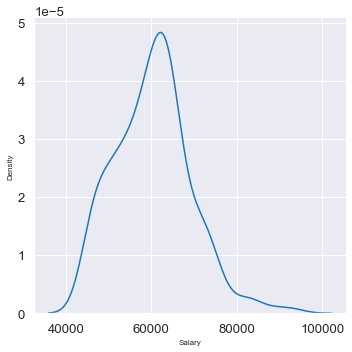

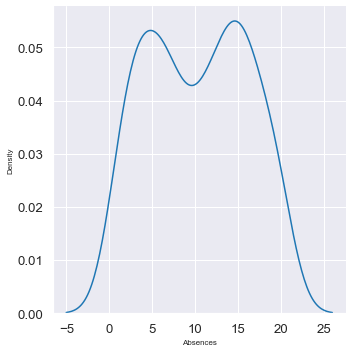

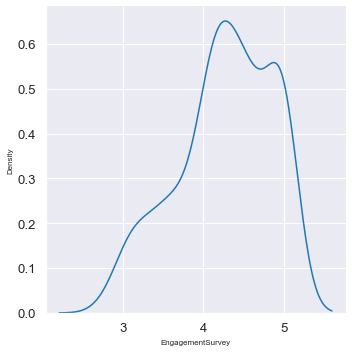

In [54]:
for i in df_clean_int.columns:
    sns.displot(df_clean_int[i], kind="kde")

## Correlazione senza outliers

Osserviamo in che modo ripulire il dataset dai valori identificati come anomali sfruttando il range interquartile delle variabili possa impattare sul calcolo della correlazione tra variabili quantitative

In [55]:
print('Matrice di correlazione calcolata con Pearson')
display(df_clean_int.corr())
print('Matrice di correlazione calcolata con Spearman')
display(df_clean_int.corr('spearman'))
print('Matrice di correlazione calcolata con Kendall')
display(df_clean_int.corr('kendall'))

Matrice di correlazione calcolata con Pearson


,Salary,Absences,EngagementSurvey
Salary,1.000000,0.092517,0.011083
Absences,0.092517,1.000000,0.012874
EngagementSurvey,0.011083,0.012874,1.000000


Matrice di correlazione calcolata con Spearman


,Salary,Absences,EngagementSurvey
Salary,1.000000,0.089728,-0.011214
Absences,0.089728,1.000000,0.021619
EngagementSurvey,-0.011214,0.021619,1.000000


Matrice di correlazione calcolata con Kendall


,Salary,Absences,EngagementSurvey
Salary,1.000000,0.058100,-0.010137
Absences,0.058100,1.000000,0.014682
EngagementSurvey,-0.010137,0.014682,1.000000


Tutti i coefficienti di correlazione utilizzati non enfatizzano alcuna correlazione interessante. Rimuovere gli outlier in questo caso nullifica le già lievi correlazioni trovate consideranto tutte le 311 osservazioni.

Specifichiamo che nell' analisi di correlazione i valori di *SpecialProjectsCount* e *DaysLateLast30* non sono riportati: questo perché l'approccio per l'individuazione di outlier utilizzando il range interquartile ha come risultato estremo quello di identificare come outlier per le due variabili tutti i valori che non corrispondono a 0, ciò a conseguenza del fatto che in entrambi i casi il primo e terzo quartile hanno valore pari a 0, come evidenziato di seguito

In [56]:
display(df['SpecialProjectsCount'].describe())
display(df['DaysLateLast30'].describe())

count    311.000000
mean       1.218650
std        2.349421
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        8.000000
Name: SpecialProjectsCount, dtype: float64

count    311.000000
mean       0.414791
std        1.294519
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: DaysLateLast30, dtype: float64

## Normalizzazione

Al fine di migliorare la distribuzione dei nostri dati, evitando dunque che vi siano dei valori molto più alti o più bassi degli altri, sono state applicati due diversi metodi di normalizzazione : *zscore* e *MinMaxScaler*.
La normalizzazione attraverso *zscore* consiste nel sottrarre la media dai diversi valori presi in input e dividere il risultato ottenuto per la loro deviazione standard.

In [57]:
cols = list(df_int.columns)

df_to_normalize = df.copy(deep = True)

df_to_normalize[cols] = zs(df_to_normalize[cols])

df_zs = df_to_normalize[cols]

In [58]:
df_zs.head()

,Salary,SpecialProjectsCount,Absences,EngagementSurvey,DaysLateLast30
0,-0.259382,-0.519538,-1.580979,0.621302,-0.320937
1,1.410101,2.038398,1.157257,1.077769,-0.320937
2,-0.161875,-0.519538,-1.238699,-1.382080,-0.320937
3,-0.160442,-0.519538,0.814977,0.925613,-0.320937
4,-0.724461,-0.519538,-1.409839,1.128487,-0.320937


I risultati ottenuti mostrano valori negativi e positivi: uno zscore negativo sta ad indicare un valore iniziale sotto la media, mentre un valore positivo sta ad indicare un valore iniziale sopra la media. Infatti si può stabilire che, ad esempio, nella seconda riga di *SpecialProjectsCount* il valore *2.038398* indica che il valore originale è 2 standard deviations sopra la media. Osservando anche i valori ottenuti attraverso il metodo *.describe()* risulta subito evidente come i valori siano molto più bassi rispetto gli originali.

In [59]:
df_zs.describe()

,Salary,SpecialProjectsCount,Absences,EngagementSurvey,DaysLateLast30
count,3.110000e+02,3.110000e+02,3.110000e+02,3.110000e+02,3.110000e+02
mean,1.070955e-18,-1.142352e-16,-1.349403e-16,-4.531923e-16,-6.318633e-17
std,1.001612e+00,1.001612e+00,1.001612e+00,1.001612e+00,1.001612e+00
min,-9.545522e-01,-5.195380e-01,-1.580979e+00,-3.791210e+00,-3.209372e-01
25%,-5.382664e-01,-5.195380e-01,-8.964199e-01,-5.325445e-01,-3.209372e-01
50%,-2.472784e-01,-5.195380e-01,-4.072135e-02,2.155537e-01,-3.209372e-01
75%,1.200548e-01,-5.195380e-01,8.149772e-01,7.480982e-01,-3.209372e-01
max,7.205692e+00,2.891044e+00,1.670676e+00,1.128487e+00,4.321457e+00


 Il metodo *MinMaxScaler*, diversamente da *zscore*, scala i valori in un range che va da 0 ad 1: dove lo zero indica il valore minimo di ogni colonna e l'uno il valore massimo.



In [60]:
#min max
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(df_int), columns=df_int.columns)

In [61]:
df_minmax.tail()

,Salary,SpecialProjectsCount,Absences,EngagementSurvey,DaysLateLast30
306,0.101716,0.000,0.631579,0.760309,0.000000
307,0.016916,0.000,0.157895,0.536082,0.833333
308,0.855821,0.750,0.789474,0.896907,0.000000
309,0.215883,0.625,0.526316,1.000000,0.000000
310,0.000000,0.000,0.052632,0.871134,0.000000


In [62]:
df_minmax.describe()

,Salary,SpecialProjectsCount,Absences,EngagementSurvey,DaysLateLast30
count,311.000000,311.000000,311.000000,311.000000,311.000000
mean,0.116976,0.152331,0.486207,0.770619,0.069132
std,0.122743,0.293678,0.308031,0.203592,0.215753
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.051014,0.000000,0.210526,0.662371,0.000000
50%,0.086673,0.000000,0.473684,0.814433,0.000000
75%,0.131688,0.000000,0.736842,0.922680,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


Visualizzando la coda possiamo osservare come tutti i valori rientrino nel range prestabilito, impedendo a valori esageratamente alti o bassi di influenzare la distribuzione dei nostri dati.

## Plot e grafici interattivi

Introduciamo alcune visualizzazioni interattive: alcune riprendono grafici precedentemente illustrati ed altre introducono nuove combinazioni di variabili studiate. Presentiamo quindi un barchart ed un istogramma riprendendo le features già considerate nelle prime sezioni.

In [63]:
fig = px.bar(tabposition, labels = dict(Position = 'Posizione lavorativa'), color= 'Sex', 
             title = 'Livelli di salario medio per dipartimento')
fig.update_yaxes( title='Salario medio')

fig.show()

In [64]:
hist_data =[df['Salary']]
group_labels = ['Salary'] 

fig2 = ff.create_distplot(hist_data, group_labels, curve_type='kde')
normal_x = fig2.data[1]['x']
normal_y = fig2.data[1]['y']


fig = px.histogram(df, x="Salary", barmode = 'overlay',
                  labels = dict(Salary='Salario', y= ''),
                  title = 'Istogramma del salario annuale')
fig.update_layout(bargap=0.3)
fig.add_vrect(x0=df['Salary'].median(), x1 = df['Salary'].median(), line_dash="dash", line_color="green")
fig.add_vrect(x0=df['Salary'].mean(), x1 = df['Salary'].mean(), line_dash="dash", line_color="red")
fig.update_yaxes( title=None)

fig.show()

Consideriamo quindi una nuova variabile, il diverso anno di assunzione degli impiegati in azienda, per realizzare un line-graph che mostri la diversa rilevanza di fonti di reclutamento impiegati nel tempo.

In [65]:
year_of_hire = []
for i in df['DateofHire']:
    year_of_hire.append(i[-4:])

df["Anno d'assunzione"] = year_of_hire

In [66]:
cross_tab_one = pd.crosstab(df["Anno d'assunzione"], df['RecruitmentSource'])

In [67]:
cross_tab_one.iplot(kind = 'spread', yTitle="Assunzioni rispetto fonti diverse", 
                    title = 'Rilevanza delle fonti di reclutamento negli anni')

C:\Users\giorg\anaconda3\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\Users\giorg\anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



Il grafico interattivo mostra la tendenza delle assunzioni dal 2006 al 2018 all'interno dell'azienda, tenendo conto in special modo delle fonti di reclutamento per i diversi impiegati: evidenziamo subito come il picco di assunzioni si registri nel 2011 (per un totale di 83 assunzioni totali) e nel 2014 (circa 50 assunzioni in tutto). Nel 2011 si è registrata un'impennata considerevole di assunzioni tramite *Indeed*, *LinkedIn* e in particolar modo tramite *Google Search*, con ben 28 impiegati assunti con quest'ultimo. Osserviamo subito dopo una forte riduzione dell'efficacia di questa fonte per il reclutamento di nuove figure in azienda, mentre dall'altro lato *Indeed* e *LinkedIn* restano sorgenti di assunzione rilevanti ed in testa anche negli anni successivi, dopo si registra una generale riduzione delle assunzioni.

In [68]:
df_int['PerformanceScore'] = df['PerformanceScore']
fig = px.scatter(df_int, x="SpecialProjectsCount", y="Salary", color="PerformanceScore", size='Salary', trendline="ols", trendline_scope="overall",
                labels = dict(SpecialProjectsCount='Numero di progetti speciali', Salary = 'Salario'),
                title = 'Correlazione tra salario e progetti speciali')
fig.show()

In [69]:
df_int['PerformanceScore'] = df['PerformanceScore']
fig = px.scatter(df_int, x="EngagementSurvey", y="DaysLateLast30", color="PerformanceScore", size='Salary', trendline="ols", trendline_scope="overall",
                labels = dict(EngagementSurvey='Coinvolgimento in azienda', DaysLateLast30 = 'Ritardi negli ultimi 30 giorni'),
                title = 'Correlazione tra ritardi e coinvolgimento in azienda')
fig.show()

Lo scatter-plot ha lo scopo di evidenziare l'anti-correlazione tra coinvolgimento in azienda e ritardi negli utlimi trenta giorni: sfruttiamo la dimensione dei punti nello scatter-plot per enfatizzare le differenze di salario tra gli impiegati (maggiore la dimensione del punto, maggiore il salario per quel particolare individuo). Anche in questo caso viene evidenziata la retta di regressione che enfatizza una leggera correlazione negativa.

In [70]:
df_int_2 = df[["Salary", "SpecialProjectsCount" ,"Absences", "EngagementSurvey", "DaysLateLast30", "Anno d'assunzione"]]

In [71]:
top = list(df_int_2["Anno d'assunzione"])

column_new = [int(x) for x in top ]
df_int_2["Anno d'assunzione"] = column_new

df_int_2 = df_int_2.sort_values("Anno d'assunzione")


In [72]:
#3D SCATTER PLOT

df_int_2['PerformanceScore'] = df['PerformanceScore']
fig = px.scatter_3d(df_int_2, x="SpecialProjectsCount", 
                    y="Anno d'assunzione", 
                    z='Salary', 
                    color = 'PerformanceScore',
                    labels = dict(Salary = 'Salario',SpecialProjectsCount='Numero progetti speciali'),
                    title = 'Livelli di salario rispetto ad anno di assunzione e coinvolgimento in progetti speciali' )
                   
                   
                   
fig.show()


Lo scatter-plot tridimensionale consente una visualizzazione approfondita del rapporto tra le variabili, esplicitando tramite il colore una quarta dimensione di riferimento, *PerformanceScore*: come osservazione generale, è possibile concentrare l'attenzione sulle due porizioni che ospitano la maggior parte dei punti: notiamo una prima concentrazione di impiegati con per lo più un livello sufficiente di performance assunti tra gli anni 2014 e 2018, con salarii in generale al di sotto dei 100000 dollari annui, tranne alcune eccezioni di spicco. Una seconda area molto popolata ospita la maggioranza degli impiegati aventi zero progetti speciali, con anni di assunzione che variano molto, dal 2006 al 2016, e con livelli di salario relativamente basso: relativamente si raggiungono i 100000 dollari annui nel gruppo di riferimento. 